In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls

avgtempwar.xls		precipitationwar.xls  Weather_Analysis.ipynb
evapotranspiration.xls	temprangewar.xls      wetdayfreqwar.xls


In [3]:
atp = pd.read_table('avgtempwar.xls')

In [4]:
s_months = list(atp.columns)

In [5]:
s_months.remove('Year')

In [6]:
months = []
for i in range(12):
    months.append(i+1)
    
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [7]:
m_map = {}

for i in range(12):
    m_map[s_months[i]] = i+1
    
m_map

{'Apr': 4,
 'Aug': 8,
 'Dec': 12,
 'Feb': 2,
 'Jan': 1,
 'Jul': 7,
 'Jun': 6,
 'Mar': 3,
 'May': 5,
 'Nov': 11,
 'Oct': 10,
 'Sep': 9}

In [8]:
avgscores = []

In [9]:
atpr = atp.drop('Year', axis=1)

In [10]:
np_df = atpr.as_matrix()

In [11]:
np_df

array([[ 23.776,  24.626,  27.569, ...,  26.783,  23.957,  21.991],
       [ 23.157,  24.73 ,  28.762, ...,  26.92 ,  22.948,  22.376],
       [ 23.035,  24.726,  28.367, ...,  25.762,  22.621,  21.122],
       ..., 
       [ 24.307,  26.228,  28.63 , ...,  28.052,  25.287,  22.45 ],
       [ 23.75 ,  26.842,  29.472, ...,  27.138,  25.927,  22.916],
       [ 23.513,  26.194,  29.849, ...,  27.457,  24.231,  23.338]])

In [12]:
for i in range(102):
    for k in range(12):
        avgscores.append(np_df[i,k])

In [13]:
avgscores

[23.776,
 24.625999999999998,
 27.569000000000003,
 31.013000000000002,
 31.930999999999997,
 30.393000000000001,
 27.201999999999998,
 26.555,
 27.998000000000001,
 26.783000000000001,
 23.956999999999997,
 21.991,
 23.156999999999996,
 24.73,
 28.761999999999997,
 31.199999999999999,
 34.194000000000003,
 31.524999999999999,
 28.438000000000002,
 28.109999999999999,
 26.948,
 26.920000000000002,
 22.948,
 22.375999999999998,
 23.035,
 24.725999999999999,
 28.366999999999997,
 31.419,
 31.895,
 31.715,
 26.875999999999998,
 26.598000000000003,
 26.890000000000001,
 25.761999999999997,
 22.620999999999999,
 21.122,
 22.436999999999998,
 23.946999999999999,
 27.708000000000002,
 31.747,
 32.463000000000001,
 29.698,
 27.696999999999999,
 27.548000000000002,
 26.886999999999997,
 26.34,
 22.875999999999998,
 21.308000000000003,
 22.440999999999999,
 23.837,
 27.874000000000002,
 30.221,
 32.826000000000001,
 31.693000000000001,
 28.329999999999998,
 26.988000000000003,
 26.811,
 26.52400

In [14]:
months = months*102

In [15]:
year = atp['Year']


In [16]:
years = list(year)

In [17]:
k = []

In [18]:
for year in years:
    for i in range(12):
        k.append(year)

In [19]:
len(k)

1224

In [20]:
df = pd.DataFrame(
    {'year': k,
     'months': months,
     'avgtemp': avgscores
    })

In [21]:
cols = list(df.columns)

In [22]:
cols

['avgtemp', 'months', 'year']

In [23]:
cols.remove('avgtemp')
cols.remove('year')

In [24]:
X = df[cols]
Y = df['avgtemp']
type(X)

pandas.core.frame.DataFrame

In [25]:
train_X= X[:864]
train_Y = Y[:864]

In [26]:
print(train_X.shape)
print(train_Y.shape)

(864, 1)
(864,)


In [27]:
test_X = X[-360:]
test_Y = Y[-360:]

In [28]:
print(test_X.shape)
print(test_Y.shape)

(360, 1)
(360,)


In [29]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [30]:
linreg = LinearRegression()

In [31]:
linreg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
linreg.score(train_X,train_Y)

0.069962031513896905

In [33]:
linreg.predict(test_X)

array([ 28.50900036,  28.24375176,  27.97850317,  27.71325458,
        27.44800599,  27.1827574 ,  26.91750881,  26.65226021,
        26.38701162,  26.12176303,  25.85651444,  25.59126585,
        28.50900036,  28.24375176,  27.97850317,  27.71325458,
        27.44800599,  27.1827574 ,  26.91750881,  26.65226021,
        26.38701162,  26.12176303,  25.85651444,  25.59126585,
        28.50900036,  28.24375176,  27.97850317,  27.71325458,
        27.44800599,  27.1827574 ,  26.91750881,  26.65226021,
        26.38701162,  26.12176303,  25.85651444,  25.59126585,
        28.50900036,  28.24375176,  27.97850317,  27.71325458,
        27.44800599,  27.1827574 ,  26.91750881,  26.65226021,
        26.38701162,  26.12176303,  25.85651444,  25.59126585,
        28.50900036,  28.24375176,  27.97850317,  27.71325458,
        27.44800599,  27.1827574 ,  26.91750881,  26.65226021,
        26.38701162,  26.12176303,  25.85651444,  25.59126585,
        28.50900036,  28.24375176,  27.97850317,  27.71

In [34]:
linreg.score(test_X,test_Y)

0.031659915276417205

In [35]:
import matplotlib.pyplot as plt

In [36]:
df.head()

,avgtemp,months,year
0,23.776,1,1901
1,24.626,2,1901
2,27.569,3,1901
3,31.013,4,1901
4,31.931,5,1901


In [37]:
plt.scatter(df['months'], df['avgtemp'])

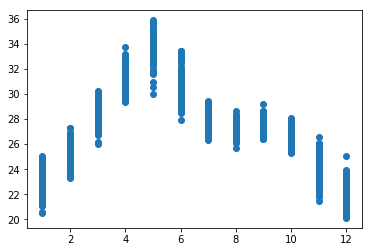

In [38]:
plt.show()

In [39]:
plt.scatter(df['year'],df['avgtemp'])

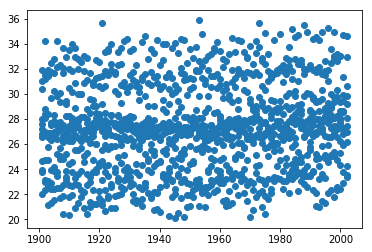

In [40]:
plt.show()

In [41]:
import seaborn as sns

In [42]:
sns.lmplot('year','avgtemp',
data= pd.concat([df['avgtemp'],
            df['year'],
            df['months']],axis=1),hue='months',fit_reg=False)

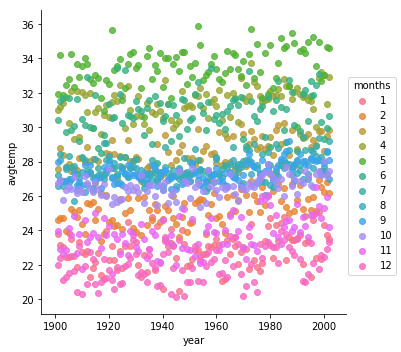

In [43]:
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

In [45]:
neigh.fit(train_X, train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [46]:
neigh.score(train_X,train_Y)

0.90926077334620548

In [47]:
neigh.score(test_X,test_Y)

0.88731420135465666

In [48]:
k = list(range(26))
k.remove(0)
for i in k:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(train_X, train_Y)
    print(" train on {} = ".format(i)+ str(neigh.score(train_X,train_Y)))
    print(" test on {} =  ".format(i) + str(neigh.score(test_X,test_Y)))

 train on 1 = 0.852138602224
 test on 1 =  0.790356715962
 train on 2 = 0.909260773346
 test on 2 =  0.887314201355
 train on 3 = 0.920001763637
 test on 3 =  0.887083916875
 train on 4 = 0.918677042829
 test on 4 =  0.888422591134
 train on 5 = 0.929933906625
 test on 5 =  0.884562321183
 train on 6 = 0.932256351776
 test on 6 =  0.883609029722
 train on 7 = 0.936967836207
 test on 7 =  0.884813427785
 train on 8 = 0.938293031998
 test on 8 =  0.883504803508
 train on 9 = 0.939950146946
 test on 9 =  0.882760179085
 train on 10 = 0.939439271209
 test on 10 =  0.883607294739
 train on 11 = 0.94129731047
 test on 11 =  0.88121851324
 train on 12 = 0.94169587556
 test on 12 =  0.876857629605
 train on 13 = 0.942432845159
 test on 13 =  0.879433173299
 train on 14 = 0.942963230583
 test on 14 =  0.876650898174
 train on 15 = 0.943385204988
 test on 15 =  0.874144083826
 train on 16 = 0.943912528855
 test on 16 =  0.875447107
 train on 17 = 0.943783805754
 test on 17 =  0.878725249142
 tra

In [51]:
#the best k is 11 which can be inferred from above scores

neigh = KNeighborsRegressor(n_neighbors=11)
neigh.fit(train_X, train_Y)
print(neigh.score(train_X,train_Y))
print(neigh.score(test_X,test_Y))

0.94129731047
0.88121851324
